# Running `make_cacofoni` with Python:

In [6]:
# Import packages
%load_ext autoreload

from ichigo.calc.cacofoni.mc.config import CacofoniConfig
from ichigo.calc.cacofoni.make_cacofoni import make_cacofoni

--------
## Step 1: Run Python `make_cacofoni` and Compare with Idl `make_cacofoni`
--------
### Step 1.1: Run `make_cacofoni` with Default Values

In [13]:
%autoreload 2

config = CacofoniConfig
# telemetry_filepath = "../../../../../data/asm/20240424/ao/aocb0016.fits"
# telemetry_filepath = "../../../../../data/asm/20250326/ao/aocb0090.fits"
# telemetry_filepath1 = "../../../../../data/asm/20250326/ao/aocb0091.fits"
# telemetry_filepath2 = "../../../../../data/asm/20250326/ao/aocb0092.fits"

#telemetry_filepath = "../../../../../data/asm/20250514/ao/aocb0011.fits"
#telemetry_filepath1 = "../../../../../data/asm/20250514/ao/aocb0012.fits"
#telemetry_filepath2 = "../../../../../data/asm/20250514/ao/aocb0013.fits"


freq, psdmes, psdmod, filter_mask, imat, laplacian = make_cacofoni()
#freq1, psdmes1, psdmod1, filter_mask1, imat1, laplacian1 = make_cacofoni(telemetry_filepath1, closed=True, debug=True, silent=True)
#freq2, psdmes2, psdmod2, filter_mask2, imat2, laplacian2 = make_cacofoni(telemetry_filepath2, closed=True, debug=True, silent=True)

# freq, psdmes, psdmod, filter_mask, imat, laplacian = make_cacofoni(telemetry_filepath, modal=True, debug=True, silent=True)


Setting up make_cacofoni...

[Config] Assuming 36 actuators from config for loading telemetry data.
[Config] Assuming 12.0 'x' subapertures from config for loading telemetry data.
[Config] Assuming 12.0 'y' subapertures from config for loading telemetry data.

[Config] Assuming 4.0 Hz for minimum frequency.
[Config] Assuming 10.0 Hz for maximum frequency.

Using default file: /Users/ellenlee/Documents/ichigo-imaka/ichigo/calc/cacofoni/python_data/aocb0090.fits

Loading imaka telemetry file...

Loading Extension 0: Loop state
------------------------------------------------
Shape of Extension             = (27000, 5)
Loading                        = 'clocktime' in 'loop'
Key Shape                      = 'clocktime': (27000,)
------------------------------------------------

Loading Extension 3: Centroids
------------------------------------------------
Shape of Extension             = (27000, 1, 288)
Loading                        = 'xcentroids' in 'wfs'
Key Shape                      =

In [15]:
import numpy as np

print(imat.shape)
print(np.min(imat))
print(np.max(imat))
print(imat[0, 0:5])

print(laplacian.shape)
print(np.min(laplacian))
print(np.max(laplacian))
print(laplacian[0, 0:5, 0])

(288, 36)
-50.620953
48.600574
[-0. -0.  0. -0. -0.]
(12, 12, 36)
-92.53545475006104
40.63824725151062
[ 0.         -0.12368839  0.68058741  0.75996932  0.9860463 ]


### Step 1.2 Compare with Idl Cacofoni

In [16]:
# To test with idl cacofoni, call these in the terminal
# .r make_cacophony
# imat1 = make_cacophony('/data/asm/20250326/ao/aocb0090.fits', 4.0, 10.0, fparm='/data/asm/20240424/ao/imakaparm.txt', laplacian=1)
# print imat[0:4, 1])

print("imat[0:6, 0] =", imat[0:6, 1])

imat[0:6, 0] = [-0.         -0.         -0.         -0.          0.40643153  0.2531224 ]


## Step 2: Plot the FFT of the Actuators and Centroids

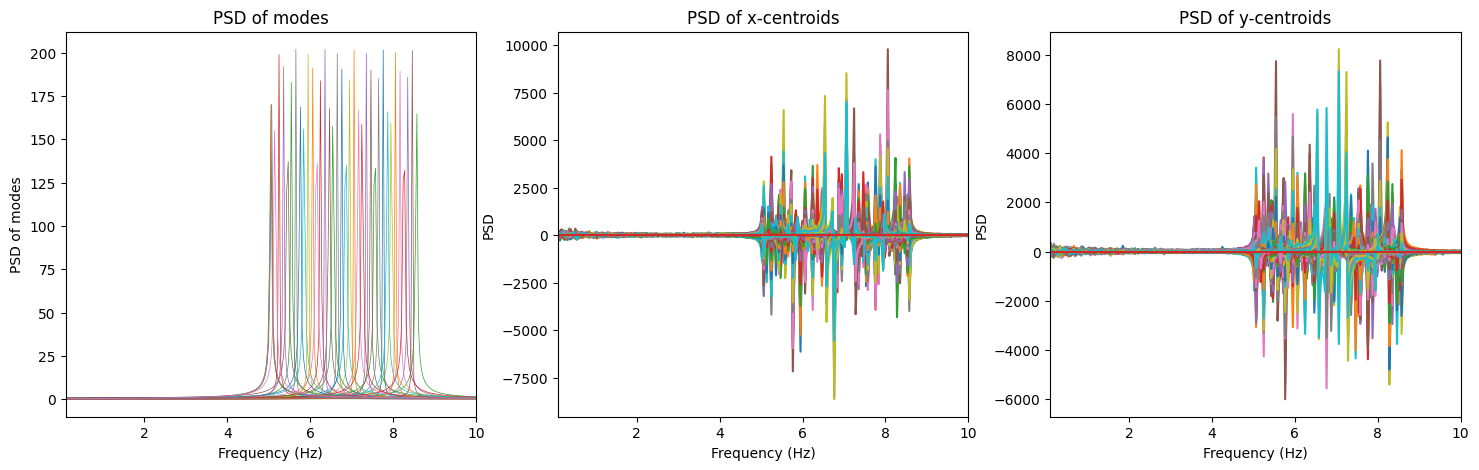

In [18]:
import matplotlib.pyplot as plt

config = CacofoniConfig
nact = config.n_actuators

fig, ax = plt.subplots(figsize=(18, 5), ncols=3, nrows=1)

ax[0].set_title('PSD of modes')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('PSD of modes')
ax[0].plot(freq, psdmod[:, 0], linewidth=1)

for i in range(nact):
    color_val = float(i) * 200. / 36. + 50.
    ax[0].plot(freq, psdmod[:, i], linewidth=0.5)

ax[0].set_xlim(0.1, 10)
# ax[0].set_ylim(0, 300)


ax[1].set_title('PSD of x-centroids')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('PSD')
# ax[1].plot(freq, psdmes[16, :], linewidth=1)

for i in range(144):
    color_val = i / 144.0
    ax[1].plot(freq, psdmes[:, i+144])
    
ax[1].set_xlim(0.1, 10)
# ax[1].set_ylim(-0.4, 0.4)

ax[2].set_title('PSD of y-centroids')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('PSD')

for i in range(144):
    color_val = i / 144.0
    ax[2].plot(freq, psdmes[:, i])
    
ax[2].set_xlim(0.1, 10)
# ax[2].set_ylim(-0.4, 0.4)

plt.show()

## Step 3: Plot the Filtered FFT of the Actuators and Centroids

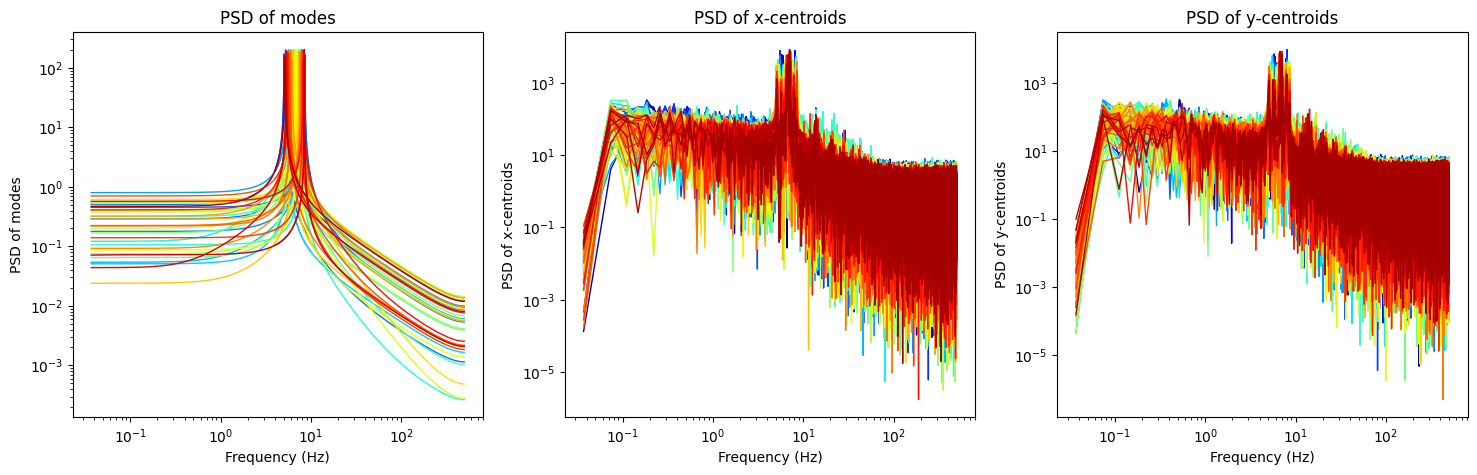

In [19]:
config = CacofoniConfig
nact = config.n_actuators

fig, ax = plt.subplots(figsize=(18, 5), ncols=3, nrows=1)

ax[0].set_title('PSD of modes')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('PSD of modes')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

for i in range(nact):
        color_val = float(i) * 200. / 36. + 50.
        ax[0].plot(freq, psdmod[:, i], color=plt.cm.jet(color_val / 255.), linewidth=1)
        ax[0].plot(freq[filter_mask], psdmod[filter_mask, i], color=plt.cm.jet(color_val / 255.), linewidth=1)
        

ax[1].set_title('PSD of x-centroids')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('PSD of x-centroids')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

for i in range(144):
    color_val = float(i) / 144. * 255.
    ax[1].plot(freq, np.abs(psdmes[:, i]), color=plt.cm.jet(color_val / 255.), linewidth=1)
    ax[1].plot(freq[filter_mask], np.abs(psdmes[filter_mask, i]), color=plt.cm.jet(color_val / 255.), linewidth=1)

ax[2].set_title('PSD of y-centroids')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('PSD of y-centroids')
ax[2].set_xscale('log')
ax[2].set_yscale('log')

for i in range(144):
        color_val = float(i) / 144. * 255.
        ax[2].plot(freq, np.abs(psdmes[:, i + 144]), color=plt.cm.jet(color_val / 255.), linewidth=1)
        ax[2].plot(freq[filter_mask], np.abs(psdmes[filter_mask, i+144]), color=plt.cm.jet(color_val / 255.), linewidth=1)

plt.show()

## Step 4: Plot the Interaction Matrix for x and y Slopes

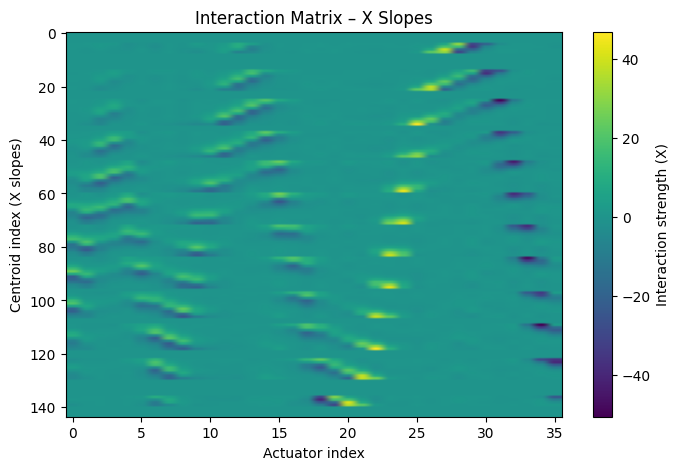

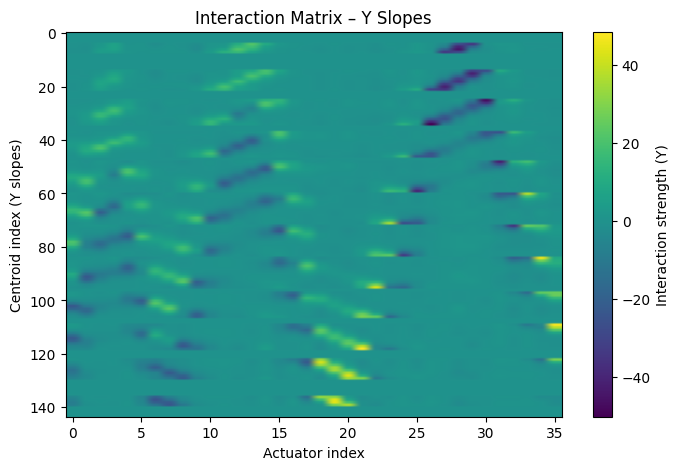

In [20]:
imat_x = imat[:144, :]   # First 144 rows: x-direction slopes
imat_y = imat[144:, :]   # Last 144 rows: y-direction slopes

plt.figure(figsize=(8, 5))
plt.imshow(imat_x, aspect='auto', cmap='viridis')
plt.colorbar(label='Interaction strength (X)')
plt.xlabel('Actuator index')
plt.ylabel('Centroid index (X slopes)')
plt.title('Interaction Matrix – X Slopes')
plt.show()

plt.figure(figsize=(8, 5))
plt.imshow(imat_y, aspect='auto', cmap='viridis')
plt.colorbar(label='Interaction strength (Y)')
plt.xlabel('Actuator index')
plt.ylabel('Centroid index (Y slopes)')
plt.title('Interaction Matrix – Y Slopes')
plt.show()

## Step 5: Plot the Laplacian
*Still under construction*

TypeError: 'float' object is not callable

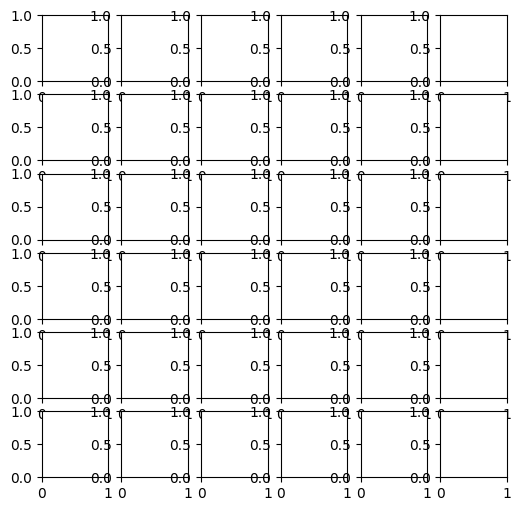

In [23]:
imsize = 50
nrows, ncols = 6, 6
zoom = 0.5

fig, axes = plt.subplots(nrows, ncols, figsize=(6, 6))

for j in range(nrows):
    for i in range(ncols):
        idx = j * ncols + i
        img = laplacian[:, :, idx].T  # transpose to match IDL view
        img_resized = zoom(img, (imsize / img.shape[0], imsize / img.shape[1]))
        ax = axes[j, i]
        ax.imshow(img_resized, cmap='gray', origin='lower')
        
        # Place number at top-left corner inside the image
        ax.text(1, 5, f"{idx + 1}", color='black', fontsize=6, ha='left', va='top')
        
        ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

TypeError: 'float' object is not callable

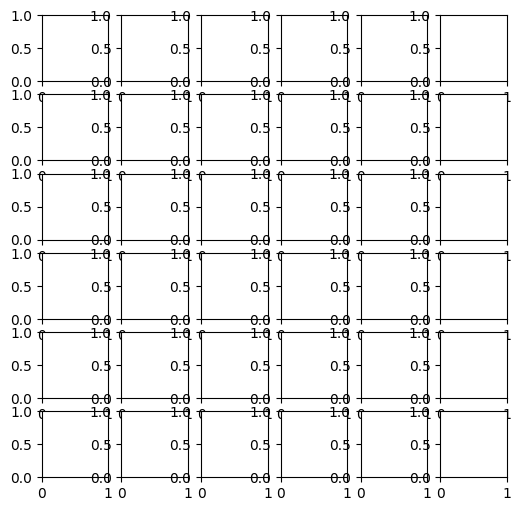

In [24]:
imsize = 50
nrows, ncols = 6, 6

fig, axes = plt.subplots(nrows, ncols, figsize=(6, 6))

vmin = laplacian.min()
vmax = laplacian.max()

# Use the last imshow to attach colorbar later
im = None

for j in range(nrows):
    for i in range(ncols):
        idx = j * ncols + i
        img = laplacian[:, :, idx].T  # transpose to match IDL view
        img_resized = zoom(img, (imsize / img.shape[0], imsize / img.shape[1]))
        ax = axes[j, i]
        im = ax.imshow(img_resized, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
        
        ax.text(1, 5, f"{idx + 1}", color='black', fontsize=6, ha='left', va='top')
        ax.axis('off')

# Add single colorbar to the right of the entire figure
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label="Laplacian Intensity")

plt.subplots_adjust(wspace=0, hspace=0, right=0.9)
plt.show()

## Test Zone for ASM Misregistration

In [34]:
from cacofoni.misreg_proto import plot_single_actuator
from cacofoni.misreg_proto import track_center_and_scale_of_single_actuator
from cacofoni.misreg_proto import plot_centers_of_single_actuator
# from cacofoni.misreg import plot_scales_of_single_actuator
# from cacofoni.misreg import plot_circles_of_single_actuator
# from cacofoni.misreg import plot_x_and_y_center_movement_for_single_actuator

# from cacofoni.misreg import fit_all_actuators
# from cacofoni.misreg import plot_all_actuators
# from cacofoni.misreg import track_centers_and_scales_of_all_actuators
# from cacofoni.misreg import plot_centers_of_all_actuators
# from cacofoni.misreg import plot_scales_of_all_actuators
# from cacofoni.misreg import plot_circles_of_all_actuators
# from cacofoni.misreg import plot_x_and_y_shifts_for_all_actuators

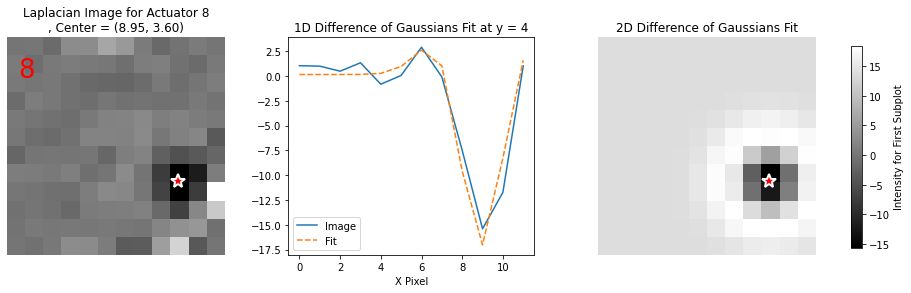

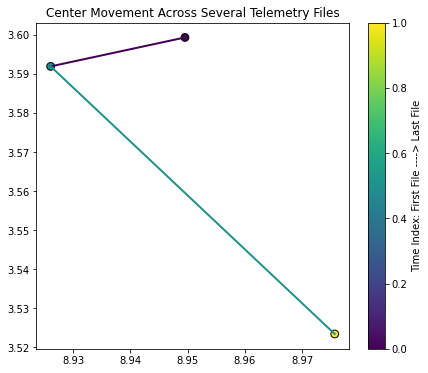

In [41]:
%autoreload 2
model = 0 # Difference of Gaussians
center = False
act_idx = 8

plot_single_actuator(laplacian, model, act_idx)
# plot_single_actuator(laplacian1, model, act_idx)
# plot_single_actuator(laplacian2, model, act_idx)
# track_center_and_scale_of_single_actuator(laplacians, model, act_idx, silent=True)
# plot_centers_of_single_actuator(laplacians, model, act_idx, silent=True, zoom=True)
# plot_x_and_y_center_movement_for_single_actuator(laplacians, model, act_idx, silent=True)
# plot_scales_of_single_actuator(laplacians, model, act_idx, silent=True)
# plot_circles_of_single_actuator(laplacians, model, act_idx, silent=True)

# fit_all_actuators(laplacian, center, model, silent=True)
# plot_all_actuators(laplacian, center, model, silent=True)
# track_centers_of_all_actuators(laplacians, center, model, silent=True)
# plot_centers_of_all_actuators(laplacians, center, model, silent=True
# plot_x_and_y_shifts_for_all_actuators(laplacians, center, model, zoom=True, silent=True, cmap_name='viridis')
# plot_scales_of_all_actuators(laplacians, center, model, silent=True)
# plot_circles_of_all_actuators(laplacians, center, model, silent=True)

In [2]:
%autoreload 2
from cacofoni.misreg.misreg import fit_single_laplacian
from cacofoni.misreg.misreg import plot_fitted_center_actuators_one_laplacian
from cacofoni.misreg.misreg import plot_fitted_center_actuator_data, get_fitted_center_data_from_laplacians

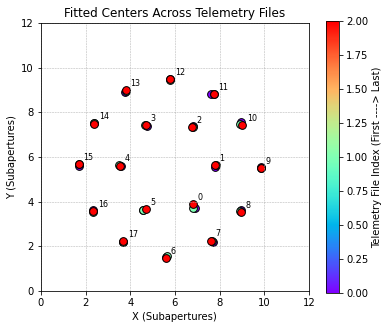

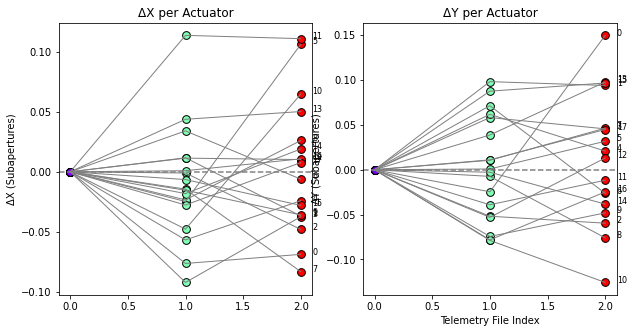

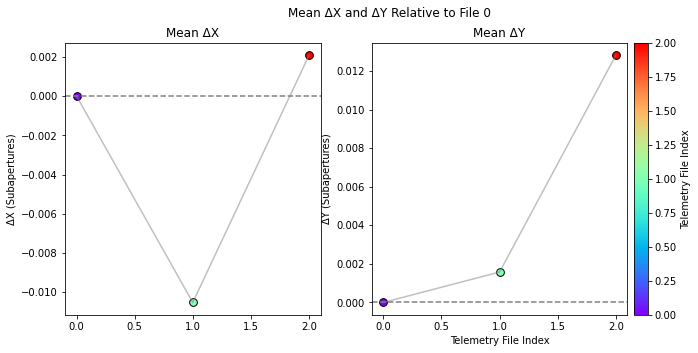

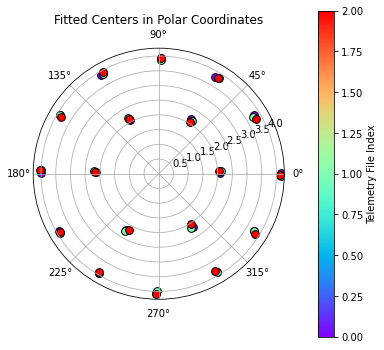

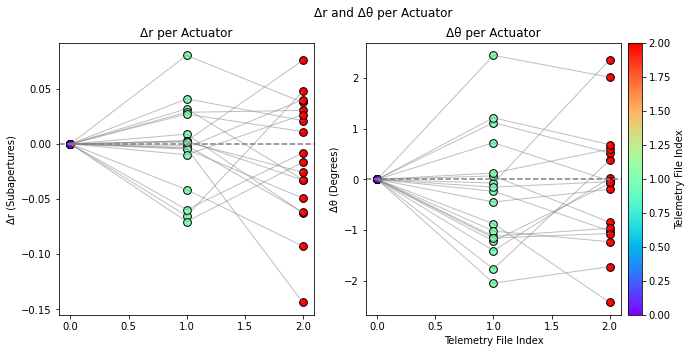

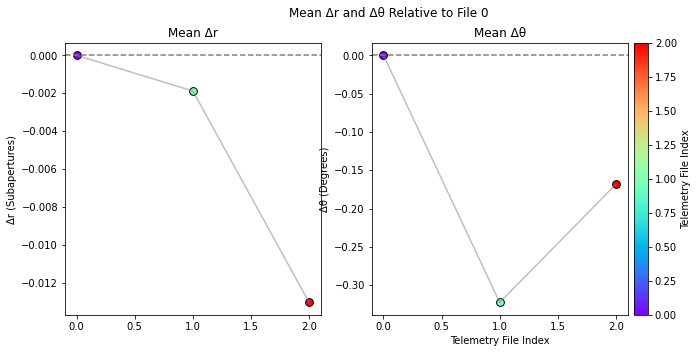

In [14]:
%autoreload 2

laplacians = [laplacian, laplacian1, laplacian2]
label = True

data_dict = get_fitted_center_data_from_laplacians(laplacians)
plot_fitted_center_actuator_data(data_dict, label)
